In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

agt_ctr_file = "~/Documents/HVAC-RL-Control/src/a3c-res-v0.1/case20-2/mz-eval_out.csv"
bas_ctr_file = "~/Documents/HVAC-RL-Control/src/a3c-res-v0.1/baselines/v1-eval-mz-23.9-25.0.csv"
st_row = 1728
ed_row = 2591

In [569]:
def f(row):
    if row['SPACE4-1:Zone People Occupant Count [](TimeStep)'] > 0:
        #print (row['SPACE1-1 PEOPLE 1:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)'])
        val = row['SPACE4-1 PEOPLE 1:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)']
    else:
        val = 0
    return val

In [570]:
df_agt = pd.read_csv(agt_ctr_file)
df_bas = pd.read_csv(bas_ctr_file)


In [571]:
df_agt.columns

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
       'Environment:Site Outdoor Air Relative Humidity [%](TimeStep)',
       'Environment:Site Wind Speed [m/s](TimeStep)',
       'Environment:Site Wind Direction [deg](TimeStep)',
       'Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep)',
       'Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)',
       'SPACE1-1:Zone People Occupant Count [](TimeStep)',
       'SPACE1-1:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
       'SPACE1-1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)',
       'SPACE1-1:Zone Air Temperature [C](TimeStep)',
       'SPACE1-1 PEOPLE 1:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)',
       'SPACE2-1:Zone People Occupant Count [](TimeStep)',
       'SPACE3-1:Zone People Occupant Count [](TimeStep)',
       'SPACE4-1:Zone People Occupant Count [](TimeStep)',
       'SPACE5-1:Zone People Occupa

In [572]:
df_bas['OPPD'] = df_bas.apply(f, axis=1)
df_agt['OPPD'] = df_agt.apply(f, axis=1)


In [564]:
x = range(ed_row - st_row + 1)
fig = plt.figure(figsize = (15, 15))
gs1 = gridspec.GridSpec(2, 1)
gs1.update(wspace=0.19, hspace=0.12)
ftsz = 24;

ax1 = plt.subplot(gs1[0])
#ax1.set_xlim(0, 41)
ax1.plot(x, df_agt['SPACE1-1:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)'].loc[st_row:ed_row],
         'r', label='Zn1 heating setpoint temperature (C)')
ax1.plot(x, df_agt['SPACE1-1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)'].loc[st_row:ed_row],
         'b', label='Zn1 cooling setpoint temperature (C)')
ax1.plot(x, df_agt['SPACE1-1:Zone Air Temperature [C](TimeStep)'].loc[st_row:ed_row],
         'g', label='Zn1 air temperature (C)')

ax1.legend(loc = 3, fancybox=True, framealpha=0.1, fontsize = 16)
ax1.set_ylabel('Temperature', fontsize = ftsz)
ax1.set_ylim([0,35])
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)

ax1_2 = ax1.twinx()
ax1_2.plot(x, df_agt['OPPD'].loc[st_row:ed_row], 'k', label='OPPD (%)')
ax1_2.plot(x, df_agt['SPACE1-1:Zone People Occupant Count [](TimeStep)'].loc[st_row:ed_row], 'k--', 
         label='Zn1 Occupant Count')
ax1_2.legend(loc = 1, fontsize = 14)
ax1_2.set_ylim([0,30])
ax1_2.set_ylabel('OPPD/Occupant Count', fontsize = ftsz)
plt.title('Trained Agent of Case 10', fontsize = ftsz)
plt.xticks(range(0, ed_row - st_row + 1 + 48, 48), 
           ['01/07 00:00', '01/07 04:00', '01/07 08:00', '01/07 12:00', '01/07 16:00', '01/07 20:00',
            '01/08 00:00', '01/08 04:00', '01/08 08:00', '01/08 12:00', '01/08 16:00', '01/08 20:00',
           '01/09 00:00', '01/09 04:00', '01/09 08:00', '01/09 12:00', '01/09 16:00', '01/09 20:00',
           '01/10 00:00'], rotation = 60)


ax2 = plt.subplot(gs1[1])
ax2.set_xlabel('Time', fontsize = ftsz)
#ax1.set_xlim(0, 41)
ax2.plot(x, df_bas['SPACE1-1:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)'].loc[st_row:ed_row],
         'r', label='Zn1 heating setpoint temperature (C)')
ax2.plot(x, df_bas['SPACE1-1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)'].loc[st_row:ed_row],
         'b', label='Zn1 cooling setpoint temperature (C)')
ax2.plot(x, df_bas['SPACE1-1:Zone Air Temperature [C](TimeStep)'].loc[st_row:ed_row],
         'g', label='Zn1 air temperature (C)')

ax2.legend(loc = 3, fontsize = 16)
ax2.set_ylabel('Temperature', fontsize = ftsz)
ax2.set_ylim([0,35])
ax2.xaxis.grid(True)
ax2.yaxis.grid(True)

ax2_2 = ax2.twinx()
ax2_2.plot(x, df_bas['OPPD'].loc[st_row:ed_row], 'k', label='OPPD (%)')
ax2_2.plot(x, df_bas['SPACE1-1:Zone People Occupant Count [](TimeStep)'].loc[st_row:ed_row], 'k--', 
         label='Zn1 Occupant Count')
ax2_2.legend(loc = 1, fontsize = 14)
ax2_2.set_ylim([0,30])
ax2_2.set_ylabel('OPPD/Occupant Count', fontsize = ftsz)

plt.title('Baseline B-23.9', fontsize = ftsz)
plt.xticks(range(0, ed_row - st_row + 1 + 48, 48), 
           ['01/07 00:00', '01/07 04:00', '01/07 08:00', '01/07 12:00', '01/07 16:00', '01/07 20:00',
            '01/08 00:00', '01/08 04:00', '01/08 08:00', '01/08 12:00', '01/08 16:00', '01/08 20:00',
           '01/09 00:00', '01/09 04:00', '01/09 08:00', '01/09 12:00', '01/09 16:00', '01/09 20:00',
           '01/10 00:00'], rotation = 60)

plt.setp(ax2.get_xticklabels(), rotation=60, fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


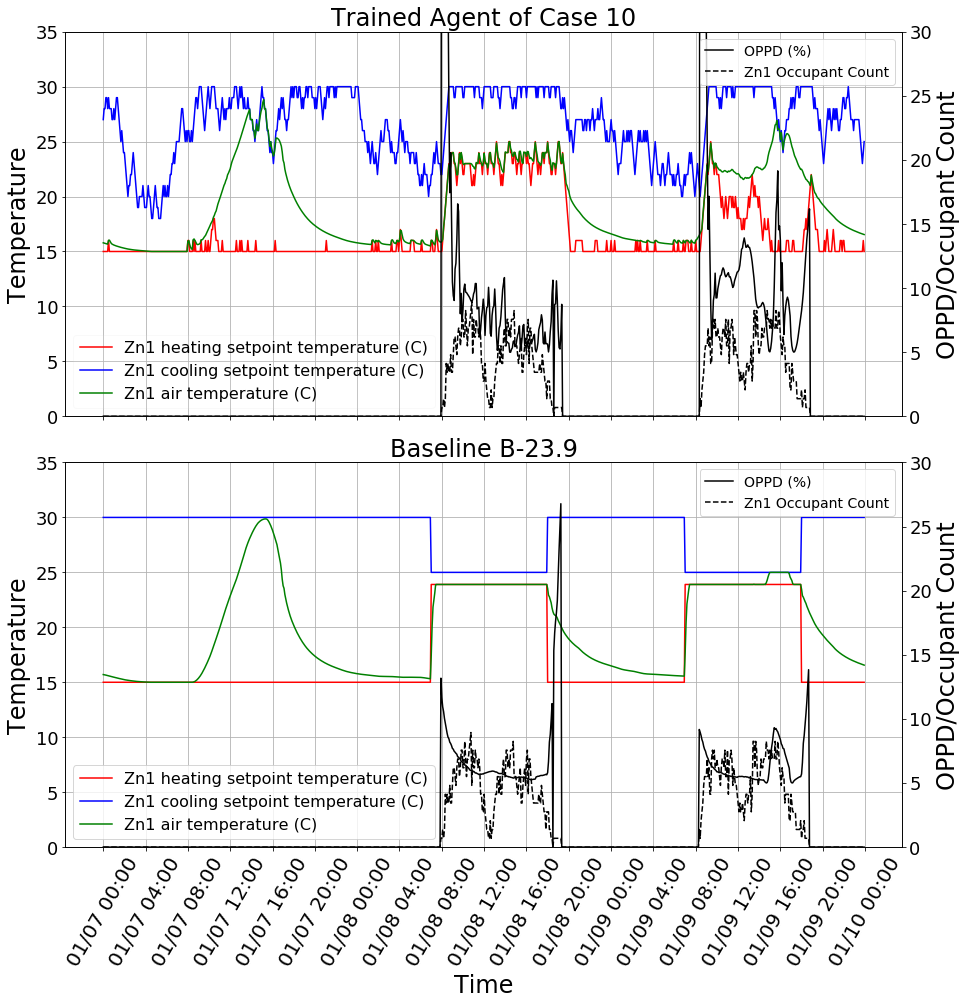

In [442]:
plt.show()

In [573]:
df_agt['Hour'] = pd.to_numeric(df_agt['Date/Time'].str.split().str.get(1).str.slice(0, 2))
df_bas['Hour'] = pd.to_numeric(df_bas['Date/Time'].str.split().str.get(1).str.slice(0, 2))
abv_20_oppd_hr = df_agt['Hour'].loc[df_agt['OPPD'] > 20]
abv_20_oppd_hr = df_bas['Hour'].loc[df_bas['OPPD'] > 20]
abv_20_oppd_hr_freq = abv_20_oppd_hr.value_counts().as_matrix().reshape(1, -1)
abv_20_oppd_hr_freq = np.append(abv_20_oppd_hr.value_counts().index.values.reshape(1, -1),
                                 abv_20_oppd_hr_freq, 0).tolist()

for hr in range(0, 24):
    if hr not in abv_20_oppd_hr_freq[0]:
        abv_20_oppd_hr_freq[0].append(hr);
        abv_20_oppd_hr_freq[1].append(0);
        
abv_20_oppd_hr_freq = np.array(abv_20_oppd_hr_freq);
abv_20_oppd_hr_freq

array([[  7,  19,  18,   6,  17,  16,  20,   0,   1,   2,   3,   4,   5,
          8,   9,  10,  11,  12,  13,  14,  15,  21,  22,  23],
       [137,  56,  27,  13,   7,   6,   5,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [574]:
sum(abv_20_oppd_hr_freq[1,:])

251

In [575]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize = 16)

/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


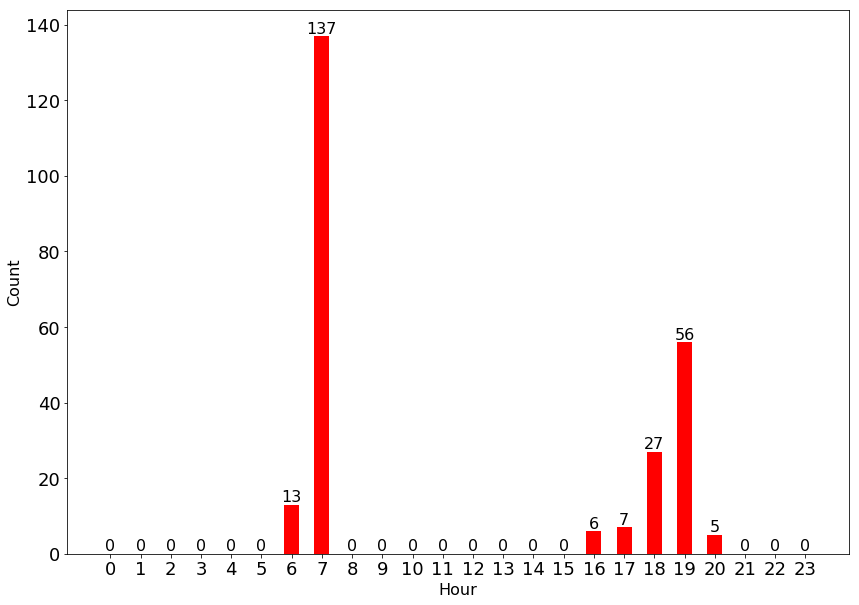

In [576]:
fig, ax = plt.subplots()
width = 0.5  
fig.set_size_inches(14, 10)

ftsz = 16;

matplotlib.rc('font', **font)
freq_plot_1 = ax.bar(abv_20_oppd_hr_freq[0, :], abv_20_oppd_hr_freq[1, :], width,
                    color = 'r')
autolabel(freq_plot_1)
ax.set_ylabel('Count', fontsize = ftsz)
ax.set_xticks(np.arange(0, 24, 1.0))
ax.set_xlabel('Hour', fontsize = ftsz)
#ax.set_title('Heating Setpoint Value Count of Zn1 During 21:00~06:00 of the Simulation Period')
plt.show()